<a href="https://colab.research.google.com/github/NoeLiceaga/Onboarding-BMW/blob/main/Onboarding_BMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Corre un modelo de clustering para hallar grupos en estos datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Variables that i think dont contribute to the model
df = df.drop(['EmployeeNumber', 'DailyRate','EnvironmentSatisfaction','YearsWithCurrManager','EmployeeCount', 'MaritalStatus', 'DistanceFromHome', 'JobLevel', 'DailyRate', 'StockOptionLevel', 'JobSatisfaction', 'RelationshipSatisfaction', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'PercentSalaryHike', 'OverTime', 'TrainingTimesLastYear', 'Education'], axis=1)
df = df.drop(['Over18', 'StandardHours'], axis=1)#Same value appear in all rows

In [ ]:
df[df.isnull().any(axis=1)].count()

Age                   0
Attrition             0
BusinessTravel        0
Department            0
EducationField        0
Gender                0
HourlyRate            0
JobInvolvement        0
JobRole               0
MonthlyIncome         0
MonthlyRate           0
NumCompaniesWorked    0
PerformanceRating     0
TotalWorkingYears     0
WorkLifeBalance       0
YearsAtCompany        0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()

df_preprocess = df.copy(deep=True)

df_preprocess['Attrition'] = label_encoding.fit_transform(df_preprocess['Attrition'].astype(str))
df_preprocess['BusinessTravel'] = label_encoding.fit_transform(df_preprocess['BusinessTravel'].astype(str))
df_preprocess['Department'] = label_encoding.fit_transform(df_preprocess['Department'].astype(str))
df_preprocess['EducationField'] = label_encoding.fit_transform(df_preprocess['EducationField'].astype(str))
df_preprocess['Gender'] = label_encoding.fit_transform(df_preprocess['Gender'].astype(str))
df_preprocess['JobRole'] = label_encoding.fit_transform(df_preprocess['JobRole'].astype(str))
df_preprocess.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
normalize =  MinMaxScaler().fit(df_preprocess.values)
df_normalize = pd.DataFrame(normalize.transform(df_preprocess.values), columns=df_preprocess.columns)
df_normalize.describe()

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000
mean,0.450567,0.161224,0.803741,0.630272,0.449524,0.600000,0.512731,0.576644,0.557313,0.289307,0.490629,0.299244,0.153741,0.28199,0.587075,0.175204
std,0.217509,0.367863,0.332727,0.263896,0.266274,0.490065,0.290420,0.237187,0.307728,0.247918,0.285797,0.277557,0.360824,0.19452,0.235492,0.153163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.285714,0.000000,0.500000,0.500000,0.200000,0.000000,0.257143,0.333333,0.250000,0.100158,0.239028,0.111111,0.000000,0.15000,0.333333,0.075000
50%,0.428571,0.000000,1.000000,0.500000,0.400000,1.000000,0.514286,0.666667,0.625000,0.205898,0.487513,0.222222,0.000000,0.25000,0.666667,0.125000
75%,0.595238,0.000000,1.000000,1.000000,0.600000,1.000000,0.767857,0.666667,0.875000,0.388099,0.737503,0.444444,0.000000,0.37500,0.666667,0.225000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Busqueda optima de clusters
#Calculando que tan similares son los individuos dentro de los cluster
wcss = []

for i in range(1, 11): #Rango maximo de 10 agrupaciones
    kmeans = KMeans(n_clusters=i, max_iter=20)
    kmeans.fit(df_normalize)
    wcss.append(kmeans.inertia_)

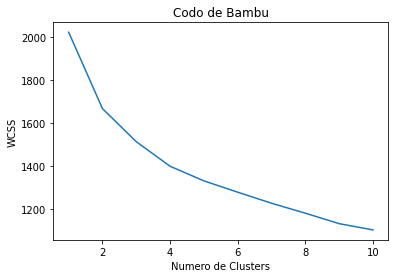

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title("Codo de Bambu")
plt.xlabel('Numero de Clusters')
plt.ylabel("WCSS") #Que tan similares son
plt.show()

In [ ]:
k1 = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
k1.elbow#Cluster ideales

4

In [ ]:
#Aplicando KMeans 
cluster = KMeans(n_clusters=4, max_iter=300)
cluster.fit(df_normalize)


KMeans(n_clusters=4)

In [ ]:
df['KMeans_Cluster'] = cluster.labels_
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,KMeans_Cluster
0,41,Yes,Travel_Rarely,Sales,Life Sciences,Female,94,3,Sales Executive,5993,19479,8,3,8,1,6,2
1,49,No,Travel_Frequently,Research & Development,Life Sciences,Male,61,2,Research Scientist,5130,24907,1,4,10,3,10,0
2,37,Yes,Travel_Rarely,Research & Development,Other,Male,92,2,Laboratory Technician,2090,2396,6,3,7,3,0,2
3,33,No,Travel_Frequently,Research & Development,Life Sciences,Female,56,3,Research Scientist,2909,23159,1,3,8,3,8,1
4,27,No,Travel_Rarely,Research & Development,Medical,Male,40,3,Laboratory Technician,3468,16632,9,3,6,3,2,3


In [ ]:
print(cluster.inertia_)

1400.3323255108999


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_normalize)
pca_DF = pd.DataFrame(data = pca_df, columns=['Componente1', 'Componente2'])
pca_nombres = pd.concat([pca_DF, df[['KMeans_Cluster']]], axis=1)
pca_nombres

,Componente1,Componente2,KMeans_Cluster
0,0.607720,0.721531,2
1,-0.363428,-0.113608,0
2,-0.477752,0.453093,2
3,0.582010,0.107089,1
4,-0.394990,-0.203693,3
...,...,...,...
1465,-0.427172,-0.272210,3
1466,-0.385668,-0.447293,3
1467,-0.411792,-0.123508,0
1468,-0.361253,0.059147,3


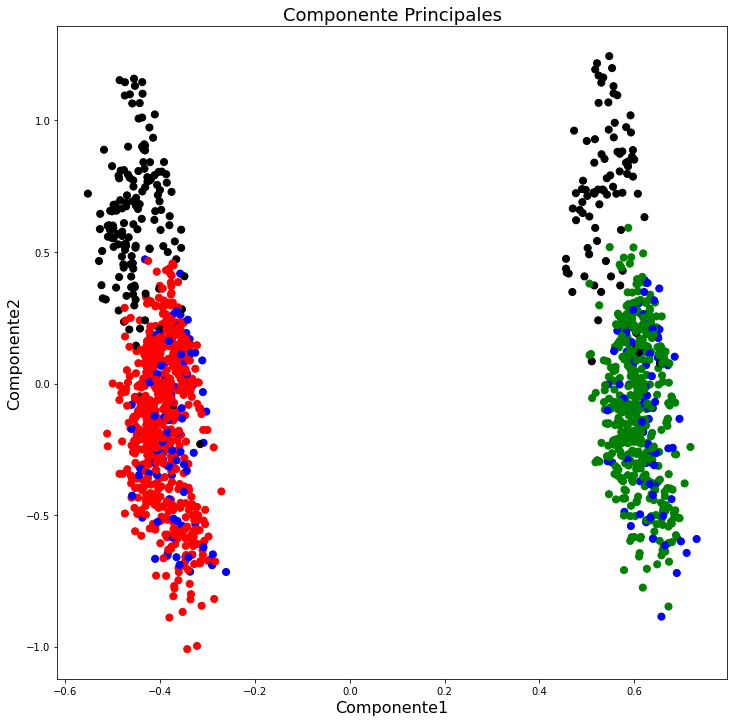

In [ ]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente1', fontsize=16)
ax.set_ylabel('Componente2', fontsize=16)
ax.set_title("Componente Principales", fontsize=18)

colors = np.array(['blue', 'green', 'black','red'])
ax.scatter(x = pca_nombres.Componente1, y = pca_nombres.Componente2, c=colors[pca_nombres.KMeans_Cluster], s=50)
plt.show()

# **Crear un model de clasificación para predecir al target “Attrition”**

In [ ]:
df_cl = df_normalize.copy()
df_cl.head(10)

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
0,0.547619,1.0,1.0,1.0,0.2,0.0,0.914286,0.666667,0.875,0.262454,0.698053,0.888889,0.0,0.200,0.000000,0.150
1,0.738095,0.0,0.5,0.5,0.2,1.0,0.442857,0.333333,0.750,0.217009,0.916001,0.111111,1.0,0.250,0.666667,0.250
2,0.452381,1.0,1.0,0.5,0.8,1.0,0.885714,0.333333,0.250,0.056925,0.012126,0.666667,0.0,0.175,0.666667,0.000
3,0.357143,0.0,0.5,0.5,0.2,0.0,0.371429,0.666667,0.750,0.100053,0.845814,0.111111,0.0,0.200,0.666667,0.200
4,0.214286,0.0,1.0,0.5,0.6,1.0,0.142857,0.666667,0.250,0.129489,0.583738,1.000000,0.0,0.150,0.666667,0.050
5,0.333333,0.0,0.5,0.5,0.2,1.0,0.700000,0.666667,0.250,0.108425,0.392291,0.000000,0.0,0.200,0.333333,0.175
6,0.976190,0.0,1.0,0.5,0.6,0.0,0.728571,1.000000,0.250,0.087467,0.316001,0.444444,1.0,0.300,0.333333,0.025
7,0.285714,0.0,1.0,0.5,0.2,1.0,0.528571,0.666667,0.250,0.088678,0.451355,0.111111,1.0,0.025,0.666667,0.025
8,0.476190,0.0,0.5,0.5,0.2,1.0,0.200000,0.333333,0.500,0.448499,0.268741,0.000000,1.0,0.250,0.666667,0.225
9,0.428571,0.0,1.0,0.5,0.6,1.0,0.914286,0.666667,0.000,0.222643,0.581530,0.666667,0.0,0.425,0.333333,0.175


In [ ]:
X = df_cl[df_cl.columns.difference(['Attrition'])]
X

,Age,BusinessTravel,Department,EducationField,Gender,HourlyRate,JobInvolvement,JobRole,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
0,0.547619,1.0,1.0,0.2,0.0,0.914286,0.666667,0.875,0.262454,0.698053,0.888889,0.0,0.200,0.000000,0.150
1,0.738095,0.5,0.5,0.2,1.0,0.442857,0.333333,0.750,0.217009,0.916001,0.111111,1.0,0.250,0.666667,0.250
2,0.452381,1.0,0.5,0.8,1.0,0.885714,0.333333,0.250,0.056925,0.012126,0.666667,0.0,0.175,0.666667,0.000
3,0.357143,0.5,0.5,0.2,0.0,0.371429,0.666667,0.750,0.100053,0.845814,0.111111,0.0,0.200,0.666667,0.200
4,0.214286,1.0,0.5,0.6,1.0,0.142857,0.666667,0.250,0.129489,0.583738,1.000000,0.0,0.150,0.666667,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.5,0.6,1.0,0.157143,1.000000,0.250,0.082254,0.409396,0.444444,0.0,0.425,0.666667,0.125
1466,0.500000,1.0,0.5,0.6,1.0,0.171429,0.333333,0.000,0.472986,0.777474,0.444444,0.0,0.225,0.666667,0.175
1467,0.214286,1.0,0.5,0.2,1.0,0.814286,1.000000,0.500,0.270300,0.123670,0.111111,1.0,0.150,0.666667,0.150
1468,0.738095,0.5,1.0,0.6,1.0,0.471429,0.333333,0.875,0.230700,0.447661,0.222222,0.0,0.425,0.333333,0.225


In [ ]:
Y = df_cl['Attrition']
Y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.35)

In [ ]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

clasificador = LogisticRegression()

In [ ]:
clasificador.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = clasificador.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


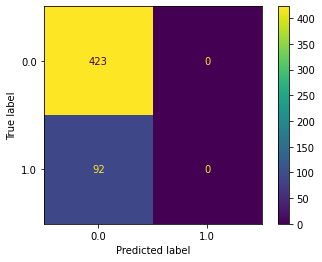

In [ ]:
plot_confusion_matrix(clasificador, X_test, Y_test)

In [ ]:
print('Accuracy:', accuracy_score(y_pred,Y_test))

Accuracy: 0.8213592233009709


**USANDO VARIOS MODELOS**

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
     

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 
     

In [ ]:
X = df_cl[df_cl.columns.difference(['Attrition'])]
Y = df_cl['Attrition']
x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.30,random_state=42)

models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

In [ ]:
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNN',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNN',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.8639455782312925,
  0.8662131519274376,
  0.8616780045351474,
  0.8480725623582767,
  0.8503401360544217,
  0.7664399092970522,
  0.8435374149659864,
  0.8231292517006803]}

In [ ]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table
     

,Modelling Algorithm,Accuracy
1,LinearSVM,0.866213
0,LogisticRegression,0.863946
2,rbfSVM,0.861678
4,RandomForestClassifier,0.850340
3,KNN,0.848073
6,GradientBoostingClassifier,0.843537
7,GaussianNB,0.823129
5,DecisionTree,0.766440


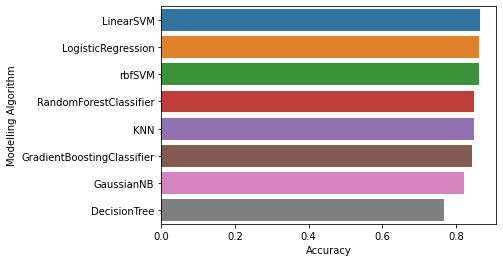

In [ ]:
import seaborn as sns
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)


# **Elimina la columna “Attrition”, y crea una regresión lineal para predecir la variable “MonthlyIncome”.**




In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Variables that i think dont contribute to the model
data = data.drop(['EmployeeNumber','EmployeeCount'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
preprocess = data.copy(deep=True)

preprocess['Attrition'] = label_encoding.fit_transform(preprocess['Attrition'].astype(str))
preprocess['BusinessTravel'] = label_encoding.fit_transform(preprocess['BusinessTravel'].astype(str))
preprocess['Department'] = label_encoding.fit_transform(preprocess['Department'].astype(str))
preprocess['EducationField'] = label_encoding.fit_transform(preprocess['EducationField'].astype(str))
preprocess['Gender'] = label_encoding.fit_transform(preprocess['Gender'].astype(str))
preprocess['JobRole'] = label_encoding.fit_transform(preprocess['JobRole'].astype(str))
preprocess['MaritalStatus'] = label_encoding.fit_transform(preprocess['MaritalStatus'].astype(str))
preprocess['Over18'] = label_encoding.fit_transform(preprocess['Over18'].astype(str))
preprocess['OverTime'] = label_encoding.fit_transform(preprocess['OverTime'].astype(str))
preprocess['StandardHours'] = label_encoding.fit_transform(preprocess['StandardHours'].astype(str))
preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [ ]:
preprocess_data = preprocess.drop(['Attrition'], axis=1)
preprocess_data.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,...,2.712245,0.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,...,2.000000,0.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,...,3.000000,0.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,...,4.000000,0.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,...,4.000000,0.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
normalize =  MinMaxScaler().fit(preprocess_data.values)
data_normalize = pd.DataFrame(normalize.transform(preprocess_data.values), columns=preprocess_data.columns)
data_normalize.values.reshape((-1,1))
data_normalize

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,0.715820,1.0,0.000000,0.25,0.2,0.333333,0.0,0.914286,...,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.5,0.250000,0.00,0.2,0.666667,1.0,0.442857,...,1.000000,0.0,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,1.0,0.909807,0.5,0.035714,0.25,0.8,1.000000,1.0,0.885714,...,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.5,0.071429,0.75,0.2,1.000000,0.0,0.371429,...,0.666667,0.0,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,1.0,0.350036,0.5,0.035714,0.00,0.6,0.000000,1.0,0.142857,...,1.000000,0.0,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.559771,0.5,0.785714,0.25,0.6,0.666667,1.0,0.157143,...,0.666667,0.0,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,1.0,0.365784,0.5,0.178571,0.00,0.6,1.000000,1.0,0.171429,...,0.000000,0.0,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,1.0,0.037938,0.5,0.107143,0.50,0.2,0.333333,1.0,0.814286,...,0.333333,0.0,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.5,0.659270,1.0,0.035714,0.50,0.6,1.000000,1.0,0.471429,...,1.000000,0.0,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [ ]:
sample = preprocess_data.loc[range(0,10)]
original = sample.copy(deep=True)
original = pd.DataFrame(original)

In [ ]:
sample = sample.drop(['MonthlyIncome'], axis=1)

In [ ]:
preprocess_data.drop(preprocess_data.index[0:10], inplace=True)
preprocess_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
10,35,2,809,1,16,3,3,1,1,84,...,3,0,1,6,5,3,5,4,0,3
11,29,2,153,1,15,2,1,4,0,49,...,4,0,0,10,3,3,9,5,0,8
12,31,2,670,1,26,1,1,1,1,31,...,4,0,1,5,1,2,5,2,4,3
13,34,2,1346,1,19,2,3,2,1,93,...,3,0,1,3,2,3,2,2,1,2
14,28,2,103,1,24,3,1,3,1,50,...,2,0,0,6,4,3,4,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,0,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,1,0,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,2,0,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,4,0,0,17,3,2,9,6,0,8


In [ ]:
X = preprocess_data[preprocess_data.columns.difference(['MonthlyIncome'])]
Y = preprocess_data['MonthlyIncome']

In [ ]:
Y

10      2426
11      4193
12      2911
13      2661
14      2028
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1460, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test=train_test_split(X, Y,test_size=0.10)

regresion =  LinearRegression()
modelo = regresion.fit(x_train, y_train)
prediction = modelo.predict(sample)
df1 = pd.DataFrame({'Value Real':original.MonthlyIncome})
df2 = pd.DataFrame({'Value Predicted':prediction})
dataframe = pd.concat([df1, df2], ignore_index=False, axis=1)
dataframe

,Value Real,Value Predicted
0,5993,5694.888950
1,5130,6127.792820
2,2090,2392.219497
3,2909,2809.873109
4,3468,2423.013847
5,3068,2123.848279
6,2670,2148.796926
7,2693,1977.681815
8,9526,9647.718845
9,5237,6086.454985
